<a href="https://colab.research.google.com/github/debsa2000/MajorProject1_EEDcurriculum/blob/main/EEDProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dataset

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal'

In [ ]:
%cd /content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal

/content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal


In [ ]:
!ls

 EEDProject.ipynb
'Literature Review papers'
"Madan sir's inputs.gdoc"
'Progress report-2: Data Preprocessing and Cleaning.gdoc'
'Project Abstract.gdoc'
 sentiment140dataset.csv
'Week1 Progress Report: Literature Review Survey.gdoc'


In [ ]:
import pandas as pd

#reading the data
df = pd.read_csv("/content/gdrive/MyDrive/EED497 Project with Prof. Madan Gopal/sentiment140dataset.csv",encoding="ISO-8859-1", header= None)

In [ ]:
df

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


## Naming Columns

In [ ]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## Dealing With Missing Values

In [ ]:
df.isna().sum()

sentiment    0
id           0
date         0
query        0
user_id      0
text         0
dtype: int64

It can be seen that there are no missing values.

## Removing redundant columns

Since only the tweet text is going to be used for classifying sentiments, the rest of the useless columns are removed:

In [ ]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [ ]:
df.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


## Labelling classes

In [ ]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))

In [ ]:
df

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


# Data Skewness Visualization


Text(0.5, 1.0, 'Sentiment Data Distribution')

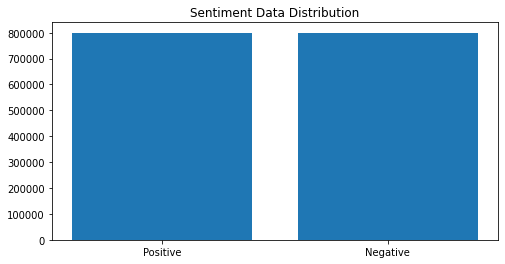

In [ ]:
val_count = df.sentiment.value_counts()

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

It's a very good dataset without any skewness

# **Data Preprocessing**


In [ ]:
df.head(15)

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
5,Negative,@Kwesidei not the whole crew
6,Negative,Need a hug
7,Negative,@LOLTrish hey long time no see! Yes.. Rains a...
8,Negative,@Tatiana_K nope they didn't have it
9,Negative,@twittera que me muera ?


### Removing URLs (http://... or https://...), hashtags, mentions(@profilename) and old style retweet text "RT"

In [ ]:
import re

def remove_junk(input_text):
  url_removed_text= re.sub(r'http\S+','',input_text)
  hashtag_removed_text= re.sub(r'@[A-Za-z0-9_]+', '',url_removed_text)
  tag_removed_text= re.sub(r'#[A-Za-z0-9_]+', '',hashtag_removed_text)
  cleaned_text= re.sub(r'^RT[\s]+', '',tag_removed_text)
  return cleaned_text

df['text'] = df['text'].apply(remove_junk)

In [ ]:
df.head(15)

,sentiment,text
0,Negative,"- Awww, that's a bummer. You shoulda got Da..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,I dived many times for the ball. Managed to s...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
5,Negative,not the whole crew
6,Negative,Need a hug
7,Negative,"hey long time no see! Yes.. Rains a bit ,onl..."
8,Negative,nope they didn't have it
9,Negative,que me muera ?


### Split attached words

In [ ]:
df

,sentiment,text
0,Negative,"- Awww, that's a bummer. You shoulda got Da..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,I dived many times for the ball. Managed to s...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fee...
1599996,Positive,TheWDB.com - Very cool to hear old Walt interv...
1599997,Positive,Are you ready for your MoJo Makeover? Ask me f...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!! ...


In [ ]:
def split_attached_words(input_text):
  splitted_text = " ".join([s for s in re.split("([A-Z][a-z]+[^A-Z]*)",input_text) if s])
  return splitted_text

df['text'] = df['text'].apply(split_attached_words)

In [ ]:
df

,sentiment,text
0,Negative,"- Awww, that's a bummer. You shoulda got ..."
1,Negative,is upset that he can't update his Facebook by...
2,Negative,I dived many times for the ball. Managed to ...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
1599995,Positive,Just woke up. Having no school is the best fe...
1599996,Positive,The WDB.com - Very cool to hear old Walt int...
1599997,Positive,Are you ready for your Mo Jo Makeover? Ask ...
1599998,Positive,Happy 38th Birthday to my boo of alll time!!!...


### Lower casing all words

In [ ]:
df['text']= df['text'].apply(lambda x: x.lower())

In [ ]:
df.head(15)

,sentiment,text
0,Negative,"- awww, that's a bummer. you shoulda got ..."
1,Negative,is upset that he can't update his facebook by...
2,Negative,i dived many times for the ball. managed to ...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it's not behaving at all. i'm mad. why am..."
5,Negative,not the whole crew
6,Negative,need a hug
7,Negative,"hey long time no see! yes.. rains a bit ,o..."
8,Negative,nope they didn't have it
9,Negative,que me muera ?


### Expanding contracted words

In [ ]:
#dictionary consisting of the contraction and the actual value
contraction_list={ "'s":" is" , "'nt":" not" , "'m":" am" , "'ll":" will" , "'d":" would" , "'ve":" have"
, "'re":" are" }

#replace the contractions
def contraction_replace(text):
  for key,value in contraction_list.items():
    if key in text:
        text=text.replace(key,value)
  return text

df['text'] = df['text'].apply(contraction_replace)

In [ ]:
df.head(15)

,sentiment,text
0,Negative,"- awww, that is a bummer. you shoulda got..."
1,Negative,is upset that he can't update his facebook by...
2,Negative,i dived many times for the ball. managed to ...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"no, it is not behaving at all. i am mad. why ..."
5,Negative,not the whole crew
6,Negative,need a hug
7,Negative,"hey long time no see! yes.. rains a bit ,o..."
8,Negative,nope they didn't have it
9,Negative,que me muera ?


### Removing stopwords

In [ ]:
#importing library of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_list = set(stopwords.words("english"))
stop_list

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
stop_list.add("can't")

In [ ]:
stop_list

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 

In [ ]:
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_list)]))

In [ ]:
df.head(15)

,sentiment,text
0,Negative,"- awww, bummer. shoulda got david carr third d..."
1,Negative,upset update facebook texting it... might cry ...
2,Negative,dived many times ball. managed save 50% rest g...
3,Negative,whole body feels itchy like fire
4,Negative,"no, behaving all. mad. here? see there."
5,Negative,whole crew
6,Negative,need hug
7,Negative,"hey long time see! yes.. rains bit ,only bit l..."
8,Negative,nope
9,Negative,que muera ?


### Removing Punctuations

In [ ]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['text']= df['text'].apply(lambda x:remove_punctuation(x))

In [ ]:
df.head(15)

,sentiment,text
0,Negative,awww bummer shoulda got david carr third day it
1,Negative,upset update facebook texting it might cry res...
2,Negative,dived many times ball managed save 50 rest go ...
3,Negative,whole body feels itchy like fire
4,Negative,no behaving all mad here see there
5,Negative,whole crew
6,Negative,need hug
7,Negative,hey long time see yes rains bit only bit lol ...
8,Negative,nope
9,Negative,que muera


### Tokenization

In [ ]:
#importing function for tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#defining function for tokenization
def tokenize(text):
  return word_tokenize(text)
    
#applying function to the column
df['tweettext_tokens']= df['text'].apply(lambda x: tokenize(x))

In [ ]:
df

,sentiment,text,tweettext_tokens
0,Negative,awww bummer shoulda got david carr third day it,"[awww, bummer, shoulda, got, david, carr, thir..."
1,Negative,upset update facebook texting it might cry res...,"[upset, update, facebook, texting, it, might, ..."
2,Negative,dived many times ball managed save 50 rest go ...,"[dived, many, times, ball, managed, save, 50, ..."
3,Negative,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]"
4,Negative,no behaving all mad here see there,"[no, behaving, all, mad, here, see, there]"
...,...,...,...
1599995,Positive,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]"
1599996,Positive,wdbcom cool hear old walt interviews â«,"[wdbcom, cool, hear, old, walt, interviews, â..."
1599997,Positive,ready mo jo makeover ask details,"[ready, mo, jo, makeover, ask, details]"
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,"[happy, 38th, birthday, boo, alll, time, tupac..."


### Stemming

In [ ]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()

In [ ]:
#defining a function for stemming
def stemming(text):
  stem_text = [porter_stemmer.stem(word) for word in text]
  return stem_text

df['text_stemmed']=df['tweettext_tokens'].apply(lambda x: stemming(x))

In [ ]:
df

,sentiment,text,tweettext_tokens,text_stemmed
0,Negative,awww bummer shoulda got david carr third day it,"[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir..."
1,Negative,upset update facebook texting it might cry res...,"[upset, update, facebook, texting, it, might, ...","[upset, updat, facebook, text, it, might, cri,..."
2,Negative,dived many times ball managed save 50 rest go ...,"[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest..."
3,Negative,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]"
4,Negative,no behaving all mad here see there,"[no, behaving, all, mad, here, see, there]","[no, behav, all, mad, here, see, there]"
...,...,...,...,...
1599995,Positive,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]","[woke, up, school, best, feel, ever]"
1599996,Positive,wdbcom cool hear old walt interviews â«,"[wdbcom, cool, hear, old, walt, interviews, â...","[wdbcom, cool, hear, old, walt, interview, â, «]"
1599997,Positive,ready mo jo makeover ask details,"[ready, mo, jo, makeover, ask, details]","[readi, mo, jo, makeov, ask, detail]"
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,"[happy, 38th, birthday, boo, alll, time, tupac...","[happi, 38th, birthday, boo, alll, time, tupac..."


### Lemmatization

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#defining the function for lemmatization
def lemmatizer(text):
  lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
  return lemm_text

df['text_lemmatized']=df['tweettext_tokens'].apply(lambda x:lemmatizer(x))

In [ ]:
df

,sentiment,text,tweettext_tokens,text_stemmed,text_lemmatized
0,Negative,awww bummer shoulda got david carr third day it,"[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir...","[awww, bummer, shoulda, got, david, carr, thir..."
1,Negative,upset update facebook texting it might cry res...,"[upset, update, facebook, texting, it, might, ...","[upset, updat, facebook, text, it, might, cri,...","[upset, update, facebook, texting, it, might, ..."
2,Negative,dived many times ball managed save 50 rest go ...,"[dived, many, times, ball, managed, save, 50, ...","[dive, mani, time, ball, manag, save, 50, rest...","[dived, many, time, ball, managed, save, 50, r..."
3,Negative,whole body feels itchy like fire,"[whole, body, feels, itchy, like, fire]","[whole, bodi, feel, itchi, like, fire]","[whole, body, feel, itchy, like, fire]"
4,Negative,no behaving all mad here see there,"[no, behaving, all, mad, here, see, there]","[no, behav, all, mad, here, see, there]","[no, behaving, all, mad, here, see, there]"
...,...,...,...,...,...
1599995,Positive,woke up school best feeling ever,"[woke, up, school, best, feeling, ever]","[woke, up, school, best, feel, ever]","[woke, up, school, best, feeling, ever]"
1599996,Positive,wdbcom cool hear old walt interviews â«,"[wdbcom, cool, hear, old, walt, interviews, â...","[wdbcom, cool, hear, old, walt, interview, â, «]","[wdbcom, cool, hear, old, walt, interview, â, «]"
1599997,Positive,ready mo jo makeover ask details,"[ready, mo, jo, makeover, ask, details]","[readi, mo, jo, makeov, ask, detail]","[ready, mo, jo, makeover, ask, detail]"
1599998,Positive,happy 38th birthday boo alll time tupac amaru ...,"[happy, 38th, birthday, boo, alll, time, tupac...","[happi, 38th, birthday, boo, alll, time, tupac...","[happy, 38th, birthday, boo, alll, time, tupac..."
